# RECAP

- Increase the training as it seemed that the centralized had more to be trained

# Trio Task


## Goal:

### Agents must learn how to navigate to a target landmark, while avoiding other agents.

- Both agents and landmarks are restarted at the begining of each episode. And agents are assigned a landmark they must navigate to, they must through trial and error be find which landmark they were assigned to.
- States are the coordinates to the other agent and to both landmarks.
- Reward is defined by the distance from an agent to its assigned landmark. If they collide both receive an extra reward=-1.


### General MDP

$$\mathcal{X} = \mathcal{X}_1 \times \mathcal{X}_2\times \mathcal{X}_3$$
$$\mathcal{A} = \mathcal{A}_1 \times \mathcal{A}_2\times \mathcal{X}_3$$
$$r = r_1(x_1) + r_2(x_2)$$

#### States


$$\mathcal{X}_1 = (\alpha^1_x, \alpha^1_y, v^ 1_x, v^ 1_y, l^1_x, l^1_y, l^2_x, l^2_y) $$
$$\mathcal{X}_2 = (\alpha^2_x, \alpha^2_y, v^2_x, v^2_y, l^1_x, l^1_y, l^2_x, l^2_y) $$
$$\mathcal{X}_3 = (\alpha^3_x, \alpha^3_y, v^3_x, v^3_y, l^1_x, l^1_y, l^3_x, l^3_y) $$

#### Actions

$$\mathcal{A}_1 = (0, 1, 2, 3, 4) $$
$$\mathcal{A}_2 = (0, 1, 2, 3, 4) $$
$$\mathcal{A}_3 = (0, 1, 2, 3, 4) $$


#### Rewards

 `TODO`

### Central Learner

The central agents solves the general MDP above.

    - Single agent.
    - Fully observable setting.
    - Learnings using the average reward from both players.
<table>
<tr>
<th>Central Agent</th>
</tr>
<tr>
<td>
$$\mathcal{X}_1 \times \mathcal{X}_2\times \mathcal{X}_3$$
$$\mathcal{A}_1 \times \mathcal{A}_2\times \mathcal{A}_3$$
$$r_1(x_1) + r_2(x_2)+ r_3(x_3)$$
</td>
</tr>
</table>

### Distributed Learners

The distributed agent have full observability but learn
independently.

    - Independent agents.
    - Fully observable setting.
    - Learnings using the average reward from both players.

<table>
<tr>
<th>Agent 1</th>
<th>Agent 2</th>
<th>Agent 3</th>    
</tr>
<tr>
<td>
$$\mathcal{X}_1 \times \mathcal{X}_2\times \mathcal{X}_3$$
$$\mathcal{A}_1 $$
$$r_1(x_1) + r_2(x_2)+ r_3(x_3)$$
</td>
<td>
$$\mathcal{X}_1 \times \mathcal{X}_2\times \mathcal{X}_3$$
$$\mathcal{A}_2 $$
$$ r_1(x_1) + r_2(x_2)+ r_3(x_3)$$
</td>
<td>
$$\mathcal{X}_1 \times \mathcal{X}_2\times \mathcal{X}_3$$
$$\mathcal{A}_2 $$
$$ r_1(x_1) + r_2(x_2)+ r_3(x_3)$$
</td>
</tr>
</table>

### Independent Learner

The distributed agent have partial observability and learn
independently.

    - Independent agents.
    - Partially observable setting.
    - Individual rewards.

<table>
<tr>
<th>Agent 1</th>
<th>Agent 2</th>
<th>Agent 3</th>
</tr>
<tr>
<td>
$$\mathcal{X}_1$$
$$\mathcal{A}_1$$
$$r_1(x_1)$$
</td>
<td>
$$\mathcal{X}_2$$
$$\mathcal{A}_2 $$
$$ r_2(x_2)$$
</td>
<td>
$$\mathcal{X}_3$$
$$\mathcal{A}_3 $$
$$ r_3(x_3)$$
</td>
</tr>
</table>

# SECTION A: Settings



1. We compare the three information strucutures above. 
2. Initially, $\tau = 100$ and it falls linearly with the number of episodes (`explore_episodes=25000`). 
3. Each test dataframe consists of the DataFrame.describe() statistics from **N** = 30 independent random trials, each of which consisting of rollouts of `M=100`, with $\tau$ set to a predetermined value.

Parameters:
```
"""Configuration"""
ALPHA = 0.05  # ALPHA:
BETA = 0.03  # BETA:
TAU = 5.0   # Final TAU
ZETA = 0.01
EXPLORE_EPISODES = 25000
EPISODES = 30000
EXPLORE = True  # WHETER OR NOT WE USE EXPLORATION

SEED = 0
BASE_PATH = 'data/03_trio_collisions_and_couplings'

N_WORKERS = 10
N_AGENTS = 3
AGENT_TYPE = 'ActorCriticIndependent'

PIPELINE_SEEDS = [
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76
]

```

## Declarations

In [1]:
import pandas as pd

FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)


def describe(dataframe: pd.DataFrame, label: str) -> pd.DataFrame:
    """Describes the dataframe
    
    Parameters
    ----------
    dataframe: pd.DataFrame
        A dataframe with description N independent rollouts.
        Each consisting of M timesteps.
        Trials are in the columns and rows are statistics.
        The result of df.describe()
   
    Returns
    -------
    dataframe: pd.DataFrame
        A description of the average return.
    
    """
    df = dataframe.drop(['std', 'count', '25%', '50%', '75%'], axis=0)
    ts = df.T.describe()['mean']
    ts.name = label
    return ts.to_frame()

## A.1) Central Agent

BASE_PATH = '03_trio_collisions_and_couplings/00_central/02/'

### A.1.1 Rollout Simulation

GIF from the best performing training.

![pipeline-central-simulation](01_trio/02_tau05_25000/00_central/02/simulation-pipeline-best.gif)

### A.1.2 Rollout Graph



![pipeline-central-simulation](03_trio_collisions_and_couplings/00_central/02/evaluation_rollout_n3_num13.png)

### A.1.3 Train<a name="A-1.3"></a> 



![pipeline-central-train-12](03_trio_collisions_and_couplings/00_central/02/train_pipeline_m30.png)
![rollout-central-train-12](03_trio_collisions_and_couplings/00_central/02/train_rollout_m30.png)

### A.1.4 Collision

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

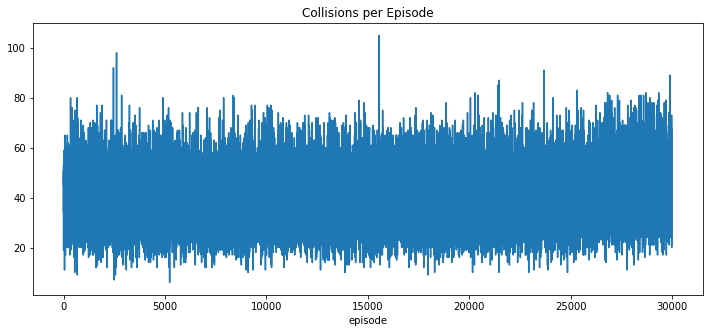

In [2]:

BASE_PATH = '03_trio_collisions_and_couplings/00_central/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

### A.1.5 Coupling

In [3]:
# BASE_PATH = '03_trio_collisions_and_couplings/00_central/02/'
# df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
# df['episode'] = df.index // 100
# df = df.set_index('episode', inplace=False, drop=True)
# df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
# df = df.groupby(by='episode', axis=0)['couplings'].sum()
# df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## A.2) Distributed Actor Critic

BASE_PATH = '03_trio_collisions_and_couplings/01_distributed_learners2/02/'

### A.2.1 Rollouts distributed learners

GIF from the best performing training.

![pipeline-central-simulation](03_trio_collisions_and_couplings/01_distributed_learners2/02/simulation-pipeline-best.gif)

### A.2.2 Rollout Graph


![pipeline-distributed-simulation](03_trio_collisions_and_couplings/01_distributed_learners2/02/evaluation_rollout_n3_num20.png)

### A.2.3 Train<a name="A-2.3"></a> 


![pipeline-distributed-train-30](03_trio_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)
![rollout-distributed-train-30](03_trio_collisions_and_couplings/01_distributed_learners2/02/train_rollout_m30.png)

### A.2.4 Collision

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

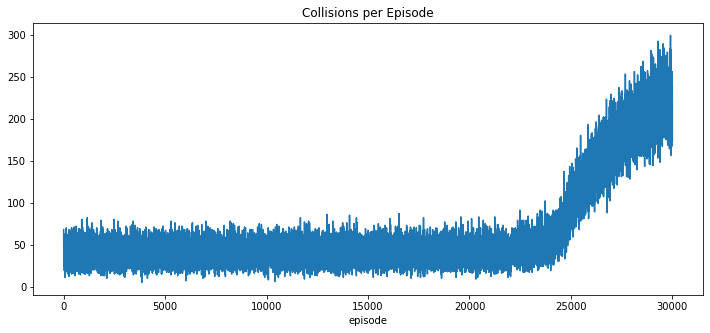

In [4]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '03_trio_collisions_and_couplings/01_distributed_learners2/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

![pipeline-distributed-train-30](03_trio_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)

### A.2.5 Coupling

In [5]:
# BASE_PATH = '03_trio_collisions_and_couplings/01_distributed_learners2/02/'
# df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
# df['episode'] = df.index // 100
# df = df.set_index('episode', inplace=False, drop=True)
# df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
# df = df.groupby(by='episode', axis=0)['couplings'].sum()
# df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## A.3) Independent Learners Actor Critic

BASE_PATH = '03_trio_collisions_and_couplings/02_independent_learners/02/'

### A.2.1 Rollouts distributed learners

GIF from the best performing training.

![pipeline-distributed-simulation](03_trio_collisions_and_couplings/02_independent_learners/02/simulation-pipeline-best.gif)

### A.3.2 Rollout Graph


![pipeline-independent-rollout](03_trio_collisions_and_couplings/02_independent_learners/02/evaluation_rollout_n3_num29.png)

### 3.3 Train <a name="A-3.3"></a> 



![pipeline-independent-train-30](03_trio_collisions_and_couplings/02_independent_learners/02/train_pipeline_m30.png)
![rollout-independent-train-30](03_trio_collisions_and_couplings/02_independent_learners/02/train_rollout_m30.png)

### A.3.4 Collision

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

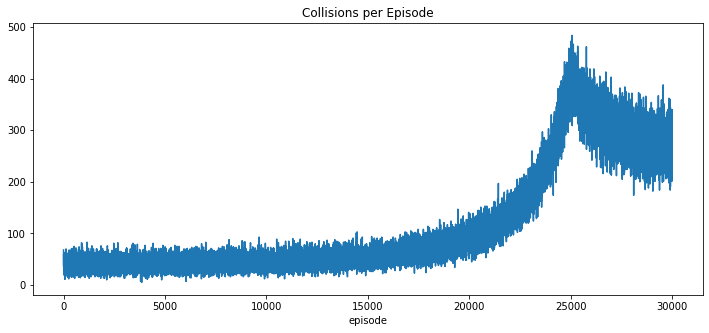

In [6]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '03_trio_collisions_and_couplings/02_independent_learners/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

### A.3.5 Coupling

In [7]:
# BASE_PATH = '03_trio_collisions_and_couplings/02_independent_learners/02/'
# df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
# df['episode'] = df.index // 100
# df = df.set_index('episode', inplace=False, drop=True)
# df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
# df = df.groupby(by='episode', axis=0)['couplings'].sum()
# df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## A.4) Leaderboard A<a name="A-leaderboard"></a> 

In [8]:
BASE_PATH = '03_trio_collisions_and_couplings/'

central_df = pd.read_csv(BASE_PATH + '00_central/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)
distributed_df = pd.read_csv(BASE_PATH + '01_distributed_learners2/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)
independent_df = pd.read_csv(BASE_PATH + '02_independent_learners/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)

In [9]:

dataframes = []
dataframes.append(describe(central_df, label='Central A'))
dataframes.append(describe(distributed_df, label='Distributed A'))
dataframes.append(describe(independent_df, label='Independent A'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central A,Distributed A,Independent A
count,30.000000,30.000000,30.000000
mean,-1.277740,-0.908939,-0.832279
std,0.308993,0.222317,0.251296
min,-2.162274,-1.469964,-1.426918
25%,-1.449746,-0.986121,-0.961933
50%,-1.247508,-0.849227,-0.785322
75%,-1.069793,-0.771460,-0.640096
max,-0.845409,-0.538311,-0.452936


# SECTION B: Settings

- Less exploration_episodes=15000
- More episodes=
- Fix coupling.


```
"""Configuration"""

ALPHA = 0.05  # ALPHA:
BETA = 0.03  # BETA:
TAU = 5.0   # Final TAU
ZETA = 0.01
EXPLORE_EPISODES = 15000
EPISODES = 35000
EXPLORE = True  # WHETER OR NOT WE USE EXPLORATION
CONSENSUS_MATRIX_TYPE = 'metropolis'

SEED = 1
BASE_PATH = 'data/06_trio_collisions_and_couplings'

N_WORKERS = 10
N_AGENTS = 3
AGENT_TYPE = 'ActorCriticCentral'

PIPELINE_SEEDS = [
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76
]

```

## B.1) Central Agent

BASE_PATH = '06_trio_collisions_and_couplings/00_central/02/'

### B.1.1 Rollout Simulation

GIF from the best performing training.

![pipeline-central-simulation](06_trio_collisions_and_couplings/00_central/02/simulation-pipeline-best.gif)

### B.1.2 Rollout Graph


[comment]: <![pipeline-central-simulation](03_trio_collisions_and_couplings/00_central/02/evaluation_rollout_n3_num13.png)>


### B.1.3 Train<a name="A-1.3"></a> 



[comment]: <![pipeline-central-train-12](03_trio_collisions_and_couplings/00_central/02/train_pipeline_m30.png)>
[comment]: <![rollout-central-train-12](03_trio_collisions_and_couplings/00_central/02/train_rollout_m30.png)>

![pipeline-central-train-30](06_trio_collisions_and_couplings/00_central/02/train_pipeline_m30.png)
![rollout-central-train-30](06_trio_collisions_and_couplings/00_central/02/train_rollout_m30.png)

### B.1.4 Collision

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

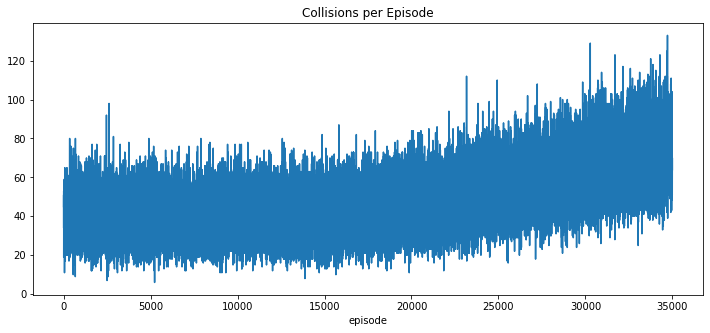

In [10]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '06_trio_collisions_and_couplings/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

### B.1.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

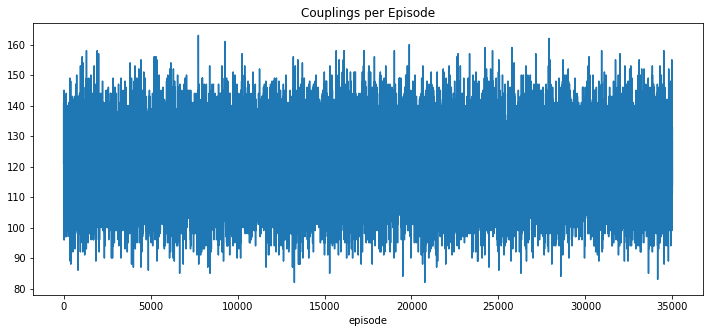

In [11]:
BASE_PATH = '06_trio_collisions_and_couplings/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## B.2) Distributed Actor Critic

BASE_PATH = '03_trio_collisions_and_couplings/01_distributed_learners2/02/'

### B.2.1 Rollouts distributed learners

GIF from the best performing training.

![pipeline-central-simulation](03_trio_collisions_and_couplings/01_distributed_learners2/02/simulation-pipeline-best.gif)



### B.2.2 Rollout Graph

[comment]: <![pipeline-distributed-simulation](03_trio_collisions_and_couplings/01_distributed_learners2/02/evaluation_rollout_n3_num20.png)>

### B.2.3 Train<a name="B-2.3"></a> 


[comment]: <![pipeline-distributed-train-30](03_trio_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)>
[comment]: <![rollout-central-train-30](03_trio_collisions_and_couplings/01_distributed_learners2/02/train_rollout_m30.png)>


[comment]: <![pipeline-central-train-12](03_trio_collisions_and_couplings/00_central/02/train_pipeline_m30.png)>
[comment]: <![rollout-central-train-12](03_trio_collisions_and_couplings/00_central/02/train_rollout_m30.png)>

![pipeline-distributed-train-30](06_trio_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)
![rollout-distributed-train-30](06_trio_collisions_and_couplings/01_distributed_learners2/02/train_rollout_m30.png)

### B.2.4 Collision

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

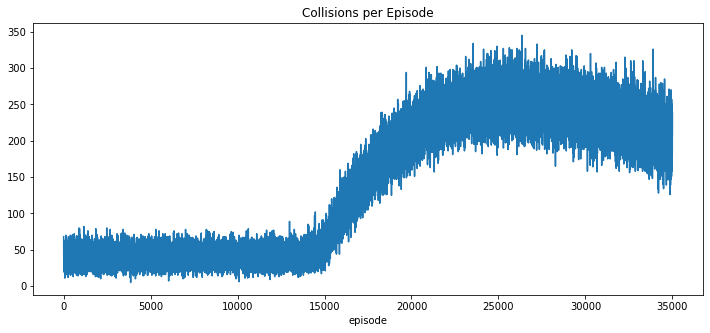

In [12]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
# BASE_PATH = '03_trio_collisions_and_couplings/01_distributed_learners2/02/'
BASE_PATH = '06_trio_collisions_and_couplings/01_distributed_learners2/02/'

df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

![pipeline-distributed-train-30](06_trio_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)

### B.2.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

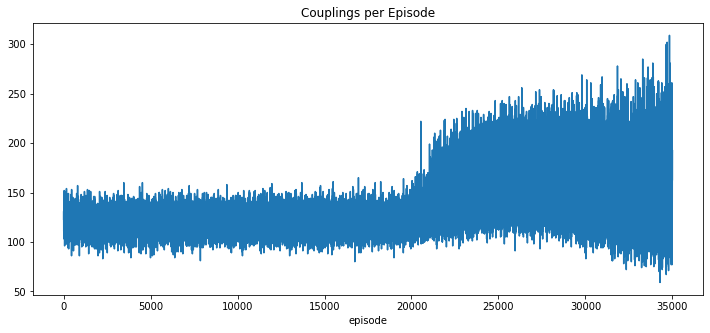

In [13]:
# BASE_PATH = '03_trio_collisions_and_couplings/01_distributed_learners2/02/'
BASE_PATH = '06_trio_collisions_and_couplings/01_distributed_learners2/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## B.3) Independent Learners Actor Critic

BASE_PATH = '06_trio_collisions_and_couplings/02_independent_learners/02/'

### B.3.1 Rollouts independent learners

GIF from the best performing training.

[comment]: <![pipeline-distributed-simulation](03_trio_collisions_and_couplings/02_independent_learners/02/simulation-pipeline-best.gif)>

### B.3.2 Rollout Graph


[comment]: <![pipeline-independent-rollout](03_trio_collisions_and_couplings/02_independent_learners/02/evaluation_rollout_n3_num29.png)>

### B.3.3 Train <a name="B-3.3"></a> 



[comment]: <![pipeline-independent-train-30](03_trio_collisions_and_couplings/02_independent_learners/02/train_pipeline_m30.png)>
[comment]: <![rollout-independent-train-30](03_trio_collisions_and_couplings/02_independent_learners/02/train_rollout_m30.png)>

![pipeline-independent-train-30](06_trio_collisions_and_couplings/02_independent_learners/02/train_pipeline_m30.png)
![rollout-independent-train-30](06_trio_collisions_and_couplings/02_independent_learners/02/train_rollout_m30.png)

### B.3.4 Collision

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

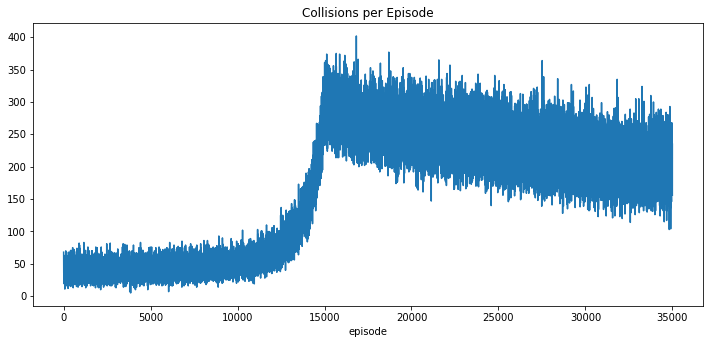

In [14]:
FIG_SIZE_LARGE = (12.0, 5.20)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
# BASE_PATH = '03_trio_collisions_and_couplings/02_independent_learners/02/'
BASE_PATH = '06_trio_collisions_and_couplings/02_independent_learners/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

### B.3.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

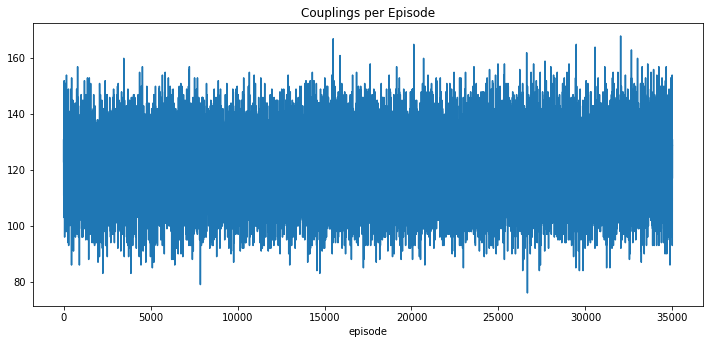

In [15]:
# BASE_PATH = '03_trio_collisions_and_couplings/02_independent_learners/02/'
BASE_PATH = '06_trio_collisions_and_couplings/02_independent_learners/02/'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## B.4) Leaderboard B<a name="B-leaderboard"></a> 

In [16]:
BASE_PATH = '06_trio_collisions_and_couplings/'

central_df = pd.read_csv(BASE_PATH + '00_central/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)
distributed_df = pd.read_csv(BASE_PATH + '01_distributed_learners2/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)
independent_df = pd.read_csv(BASE_PATH + '02_independent_learners/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)

In [17]:
dataframes = []
dataframes.append(describe(central_df, label='Central B'))
dataframes.append(describe(distributed_df, label='Distributed B'))
dataframes.append(describe(independent_df, label='Independent B'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central B,Distributed B,Independent B
count,30.000000,30.000000,30.000000
mean,-1.078175,-0.945635,-0.865534
std,0.220977,0.282306,0.241926
min,-1.933295,-1.813495,-1.710970
25%,-1.167042,-1.105131,-0.971708
50%,-1.082496,-0.858401,-0.806108
75%,-0.947310,-0.735590,-0.703592
max,-0.665997,-0.580675,-0.557197


In [18]:
BASE_PATH = '03_trio_collisions_and_couplings/'

central_df = pd.read_csv(BASE_PATH + '00_central/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)
distributed_df = pd.read_csv(BASE_PATH + '01_distributed_learners2/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)
independent_df = pd.read_csv(BASE_PATH + '02_independent_learners/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)

dataframes = []
dataframes.append(describe(central_df, label='Central A'))
dataframes.append(describe(distributed_df, label='Distributed A'))
dataframes.append(describe(independent_df, label='Independent A'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central A,Distributed A,Independent A
count,30.000000,30.000000,30.000000
mean,-1.277740,-0.908939,-0.832279
std,0.308993,0.222317,0.251296
min,-2.162274,-1.469964,-1.426918
25%,-1.449746,-0.986121,-0.961933
50%,-1.247508,-0.849227,-0.785322
75%,-1.069793,-0.771460,-0.640096
max,-0.845409,-0.538311,-0.452936


# SECTION C: More training

```
"""Configuration"""
ALPHA = 0.05  # ALPHA:
BETA = 0.03  # BETA:
TAU = 5.0   # Final TAU
ZETA = 0.01
EXPLORE_EPISODES = 15000
EPISODES = 50000
EXPLORE = True  # WHETER OR NOT WE USE EXPLORATION
CONSENSUS_MATRIX_TYPE = 'metropolis'

SEED = 1
BASE_PATH = 'data/08_trio_collisions_and_couplings'

N_WORKERS = 10
N_AGENTS = 3
AGENT_TYPE = 'ActorCriticCentral'

PIPELINE_SEEDS = [
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76
]
```

## C.1) Central Agent

BASE_PATH = '08_trio_collisions_and_couplings/00_central/02/'

### C.1.1 Rollout Simulation

GIF from the best performing training.

![pipeline-central-simulation](08_trio_collisions_and_couplings/00_central/02/simulation-pipeline-best.gif)

### C.1.2 Rollout Graph


![pipeline-central-simulation](08_trio_collisions_and_couplings/00_central/02/evaluation_rollout_n3_num13.png)


##### C.1.3 Train <a name="C-1.3"></a> 



[comment]: <![pipeline-central-train-12](03_trio_collisions_and_couplings/00_central/02/train_pipeline_m30.png)>
[comment]: <![rollout-central-train-12](03_trio_collisions_and_couplings/00_central/02/train_rollout_m30.png)>

![pipeline-central-train-30](08_trio_collisions_and_couplings/00_central/02/train_pipeline_m30.png)
![rollout-central-train-30](08_trio_collisions_and_couplings/00_central/02/train_rollout_m30.png)

### C.1.4 Collision

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

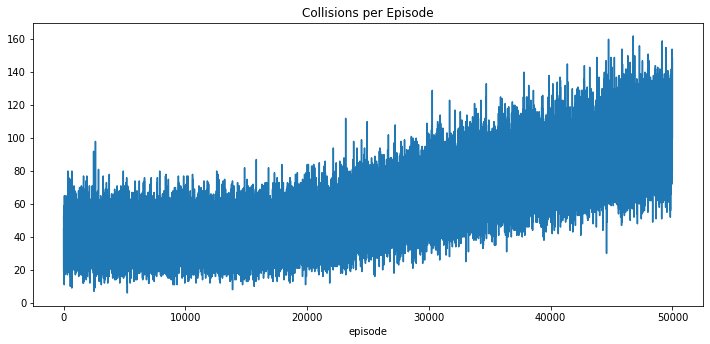

In [19]:
BASE_PATH = '08_trio_collisions_and_couplings/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

### C.1.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

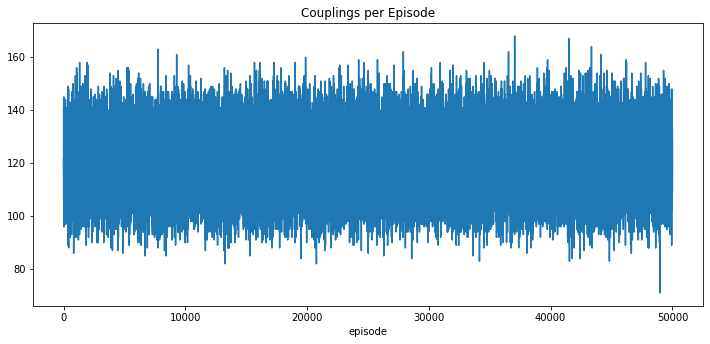

In [20]:
BASE_PATH = '08_trio_collisions_and_couplings/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## LEADERBOARD C

In [21]:
BASE_PATH = '06_trio_collisions_and_couplings/'

central_b_df = pd.read_csv(BASE_PATH + '00_central/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)
distributed_b_df = pd.read_csv(BASE_PATH + '01_distributed_learners2/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)
independent_b_df = pd.read_csv(BASE_PATH + '02_independent_learners/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)

BASE_PATH = '08_trio_collisions_and_couplings/'

central_c_df = pd.read_csv(BASE_PATH + '00_central/02/pipeline-rollouts-summary.csv', sep=',', index_col=0)


dataframes = []
dataframes.append(describe(central_c_df, label='Central C'))
dataframes.append(describe(central_b_df, label='Central B'))
dataframes.append(describe(distributed_b_df, label='Distributed B'))
dataframes.append(describe(independent_b_df, label='Independent B'))
noregdf = pd.concat(dataframes, axis=1)
noregdf

,Central C,Central B,Distributed B,Independent B
count,30.000000,30.000000,30.000000,30.000000
mean,-1.014016,-1.078175,-0.945635,-0.865534
std,0.197112,0.220977,0.282306,0.241926
min,-1.732008,-1.933295,-1.813495,-1.710970
25%,-1.112520,-1.167042,-1.105131,-0.971708
50%,-0.971971,-1.082496,-0.858401,-0.806108
75%,-0.872067,-0.947310,-0.735590,-0.703592
max,-0.783911,-0.665997,-0.580675,-0.557197
